In [2]:
import pandas as pd
import numpy as np
import ast
import json
import re
from collections import defaultdict

In [3]:
df = pd.read_csv('data/final_dataset_reduced.csv')

In [4]:
dataset_dict_list = df.to_dict('records')

In [5]:
lyrics_matrix = [s['lyrics'] for s in dataset_dict_list]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
vectorizer = TfidfVectorizer()
td_matrix = vectorizer.fit_transform(lyrics_matrix)

In [8]:
feature_names = vectorizer.get_feature_names() 
len(feature_names)

54844

In [9]:
from scipy.sparse.linalg import svds
# do SVD with a very large k (we usually use 100), just for the sake of getting many sorted singular values (aka importances)
u,s,v_trans = svds(td_matrix, k=1000)

KeyboardInterrupt: 

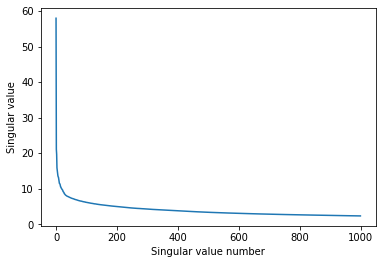

In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [18]:
u,s,v_trans = svds(td_matrix, k=100)
v = v_trans.transpose()

In [33]:
r = 0.25
USr = u @ (np.diag(s) ** r)
USr.shape

(32014, 100)

In [34]:
with open('lyrics_USr.json', 'w') as fp:
  json.dump(USr.tolist(), fp)

In [35]:
with open('data/albums_to_song_indexes.json', 'r') as fp:
  albums_to_song_indexes = json.load(fp)

In [36]:
albums_to_lyrics_USr = dict()

In [37]:
for album, song_indexes in albums_to_song_indexes.items():
    album_lyric_USr = np.zeros(100)
    for s_idx in song_indexes:
        album_lyric_USr += USr[s_idx]
    
    album_lyric_USr /= len(song_indexes)

    albums_to_lyrics_USr[album] = album_lyric_USr.tolist()

In [38]:
albums_to_lyrics_USr

{'BEYONCÉ - Beyoncé': [0.003275295876040063,
  9.171962005542253e-05,
  -0.000672063966215902,
  -0.0018289934813442922,
  -0.00021517732002755937,
  -0.00024231331765433434,
  0.004669533709467809,
  -0.004574262722299512,
  -0.002947699611826743,
  0.0013343998178911838,
  -0.002562425609306411,
  -0.0020346737083417952,
  0.0005836598106897772,
  -0.0002909940818145735,
  0.0009288230700699669,
  -0.002449687897644328,
  -0.003463694344693885,
  -0.0030625274844297144,
  0.0024653944751615695,
  0.0011475456939038428,
  -0.0011211357632229572,
  -0.0005809550205042898,
  -1.7026227935399165e-05,
  -0.0007844218494637707,
  0.0001986270920899486,
  -0.0017081396515366924,
  -0.0006643863191100755,
  -0.003395717461351962,
  -0.0007970929063075697,
  -0.0017847729898817877,
  0.0015171783271563791,
  0.0028694687424531537,
  0.003659826039058015,
  0.0015595310472320677,
  0.0005988738359068936,
  0.0004045555296945582,
  -0.007099315025921838,
  0.0013626177675543148,
  0.00133478650

In [39]:
with open('albums_to_lyrics_USr.json', 'w') as fp:
  json.dump(albums_to_lyrics_USr, fp)